# 

# Yüksek Öğrenim Öğrencileri Performans Değerlendirmesi

In [2]:
import numpy as np
import pandas as pd

input data files are available in the read-only

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

In [43]:
from subprocess import check_output
sns.set_style('whitegrid')
%matplotlib inline
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [44]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

def annotate_bar_plot(barplot, fontsize=12, num_type=float):
    for bar in barplot.patches:
        position = (bar.get_x() + bar.get_width() / 2, bar.get_height())
        text = f'{bar.get_height():.2f}' if num_type == float else f'{bar.get_height():g}'
        barplot.annotate(text=text, xy=position, ha='center', va='center',
                         size=fontsize, xytext=(0, 8), textcoords='offset points')

palette = sns.color_palette('Set2')
prediction = pd.read_csv("student_prediction.csv")

In [45]:
display(prediction)

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,KIDS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1
5,STUDENT6,2,2,2,3,2,2,2,2,1,1,3,3,2,1,2,3,1,1,2,1,1,1,1,1,1,2,1,2,4,4,1,2
6,STUDENT7,1,2,2,4,2,2,2,1,1,3,1,3,1,1,2,4,2,2,2,2,1,2,1,1,3,3,3,3,4,4,1,5
7,STUDENT8,1,1,2,3,1,1,1,2,2,3,4,3,1,1,4,3,1,2,2,1,1,1,3,1,3,2,2,1,1,1,1,2
8,STUDENT9,2,1,3,3,2,1,1,1,1,3,2,4,2,1,2,4,1,2,2,1,1,1,1,1,3,2,2,2,4,3,1,5
9,STUDENT10,2,1,2,3,2,2,1,3,4,2,1,2,3,1,2,3,2,2,2,1,1,2,1,1,2,2,2,2,1,2,1,0


In [46]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

In [47]:
prediction.shape

(145, 33)

In [48]:
attr_map = {
    'age': {
        1: '18-21',
        2: '22-25',
        3: 'Above 26'
    },
    'gender': {1: 'Female', 2: 'Male'},
    'hs_type': {
        1: 'Private',
        2: 'State',
        3: 'Other'
    },
    'scholarship': {
        1: '0%',
        2: '25%',
        3: '50%',
        4: '75%',
        5: '100%'
    }, 
    'work': {1: 'Yes', 2: 'No'}, 
    'activity': {1: 'Yes', 2: 'No'},
    'partner': {1: 'Yes', 2: 'No'},
    'salary': {
        1: '$135-200',
        2: '$201-270',
        3: '$271-340',
        4: '$341-410',
        5: 'Above $410',
    },
    'transport': {
        1: 'Bus',
        2: 'Private car/taxi',
        3: 'Bicycle',
        4: 'Other'
    }, 
    'living': {
        1: 'Rental',
        2: 'Dormitory',
        3: 'With family',
        4: 'Other'
    },
    'mother_edu': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    },
    'father_edu': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    },  
    'kids': {
        1: 'Married',
        2: 'Divorced',
        3: 'Died - one of them or both'
    },
    'mother_job': {
        1: 'Retired',
        2: 'Housewife',
        3: 'Government officer',
        4: 'Private sector employee',
        5: 'Self-employment',
        6: 'Other'
    },
    'father_job': {
        1: 'Retired',
        2: 'Government officer',
        3: 'Private sector employee',
        4: 'Self-employment',
        5: 'Other'
    },
    'study_hrs': {
        1: 'None',
        2: '<5 hours',
        3: '6-10 hours',
        4: '11-20 hours',
        5: 'More than 20 hours'
    },
    'read_freq': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Often'
    },
    'read_freq_sci': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Often'
    },
    'attend_dept': {1: 'Yes', 2: 'No'},
    'impact': {
        1: 'Positive',
        2: 'Negative',
        3: 'Neutral'
    },
    'attend': {1: 'Yes', 2: 'No'},
    'prep_study': {
        1: 'Alone',
        2: 'With friends',
        3: 'Not applicable'
    },
    'prep_exam': {
        1: 'Closest date to the exam', 
        2: 'Regularly during the semester',
        3: 'Never'
    },
    'notes': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'listens': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'likes_discuss': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'classroom': {
        1: 'Not useful',
        2: 'Useful',
        3: 'Not applicable'
    },
    'cuml_gpa': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    },
    'exp_gpa': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    }
}

In [49]:
prediction.columns = [x.lower() for x in prediction.columns]
for col in prediction.columns.tolist():
    if col not in list(attr_map.keys()):
        continue
    if col == '#_siblings':
        prediction[col].apply(lambda x: '5 or above' if x == 5 else str(x))
    else:
        prediction[col] = prediction[col].map(attr_map[col])
prediction.head()

,studentid,age,gender,hs_type,scholarship,work,activity,partner,salary,transport,living,mother_edu,father_edu,#_siblings,kids,mother_job,father_job,study_hrs,read_freq,read_freq_sci,attend_dept,impact,attend,prep_study,prep_exam,notes,listens,likes_discuss,classroom,cuml_gpa,exp_gpa,course id,grade
0,STUDENT1,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,Rental,Primary school,Secondary school,3,Married,Housewife,Other,6-10 hours,Sometimes,Sometimes,Yes,Positive,Yes,Alone,Closest date to the exam,Always,Sometimes,Never,Useful,<2.00,<2.00,1,1
1,STUDENT2,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,Rental,Secondary school,High school,2,Married,Housewife,Retired,<5 hours,Sometimes,Sometimes,Yes,Positive,Yes,Alone,Closest date to the exam,Always,Sometimes,Always,Useful,2.00-2.49,2.50-2.99,1,1
2,STUDENT3,22-25,Male,State,50%,No,No,No,$201-270,Other,Dormitory,Secondary school,Secondary school,2,Married,Housewife,Retired,<5 hours,Never,Sometimes,Yes,Positive,Yes,Alone,Closest date to the exam,Sometimes,Sometimes,Never,Not useful,2.00-2.49,2.00-2.49,1,1
3,STUDENT4,18-21,Female,Private,50%,Yes,No,Yes,$201-270,Bus,Dormitory,Primary school,Secondary school,5,Married,Housewife,Retired,6-10 hours,Never,Sometimes,Yes,Positive,Yes,Alone,Regularly during the semester,Always,Sometimes,Sometimes,Not useful,2.50-2.99,2.00-2.49,1,1
4,STUDENT5,22-25,Male,Private,50%,No,No,Yes,$271-340,Bus,Other,High school,High school,2,Married,Housewife,Self-employment,<5 hours,Never,Never,Yes,Positive,Yes,With friends,Closest date to the exam,Sometimes,Sometimes,Sometimes,Not useful,2.00-2.49,2.00-2.49,1,1


In [50]:
prediction.describe()

,#_siblings,course id,grade
count,145.000000,145.000000,145.000000
mean,2.806897,4.131034,3.227586
std,1.360640,3.260145,2.197678
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000
75%,4.000000,7.000000,5.000000
max,5.000000,9.000000,7.000000


In [51]:
prediction.columns

Index(['studentid', 'age', 'gender', 'hs_type', 'scholarship', 'work',
       'activity', 'partner', 'salary', 'transport', 'living', 'mother_edu',
       'father_edu', '#_siblings', 'kids', 'mother_job', 'father_job',
       'study_hrs', 'read_freq', 'read_freq_sci', 'attend_dept', 'impact',
       'attend', 'prep_study', 'prep_exam', 'notes', 'listens',
       'likes_discuss', 'classroom', 'cuml_gpa', 'exp_gpa', 'course id',
       'grade'],
      dtype='object')

# Gender and Age

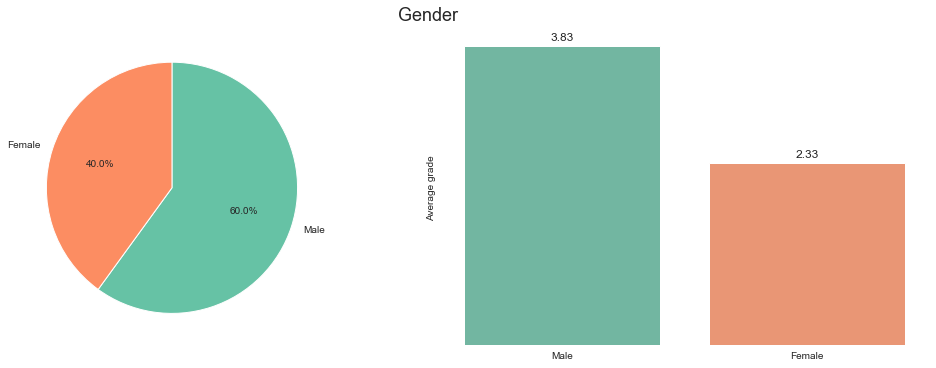

In [52]:
data = prediction['gender'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = prediction.groupby('gender')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Gender', fontsize=18)
plt.show()

at Faculty of Engineering and Faculty of Educational Sciences, there more male students than female. Male students have higher grade than female.

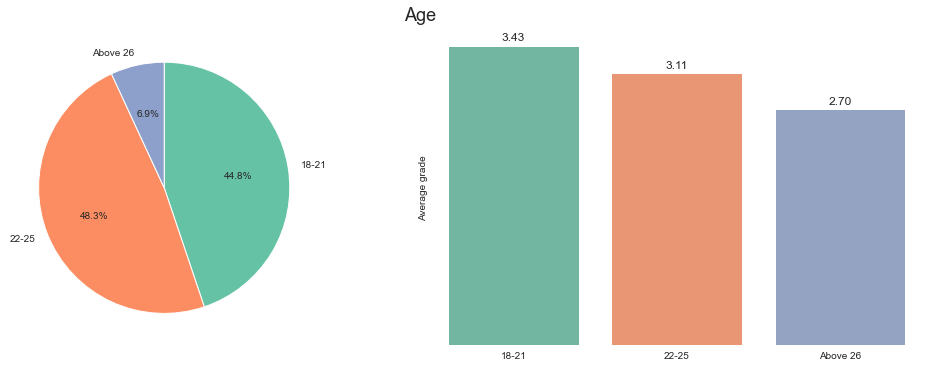

In [53]:
order = list(attr_map['age'].values())
data = prediction['age'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)
data = prediction.groupby('age')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Age', fontsize=18)
plt.show()

younger students have higher grades.

In [55]:
prediction['gender'].value_counts()

Male      87
Female    58
Name: gender, dtype: int64

Percentage Male      0.6
Female    0.4
Name: gender, dtype: float64


<AxesSubplot:>

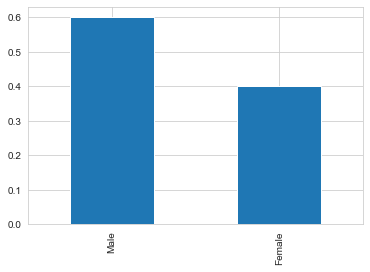

In [56]:
print('Percentage', prediction.gender.value_counts(normalize=True))
prediction.gender.value_counts(normalize=True).plot(kind='bar')

# Education

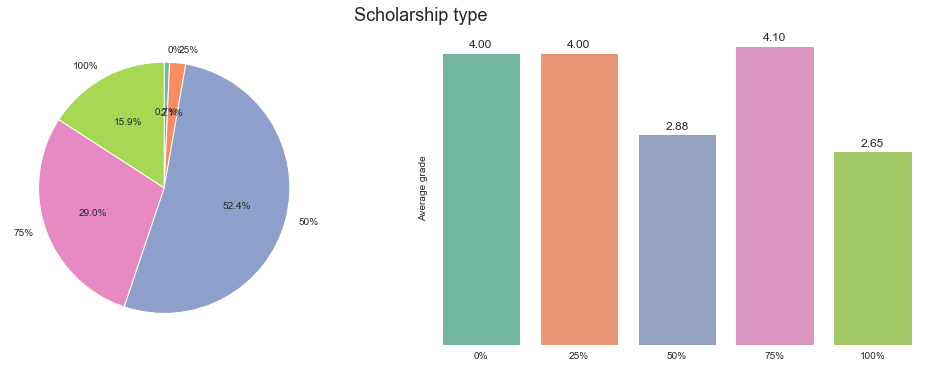

In [57]:
order = list(attr_map['scholarship'].values())
data = prediction['scholarship'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = prediction.groupby('scholarship')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Scholarship type', fontsize=18)
plt.show()

sahip olunan burs derecesi öğrenci başarısında büyük bir kriter değil. 

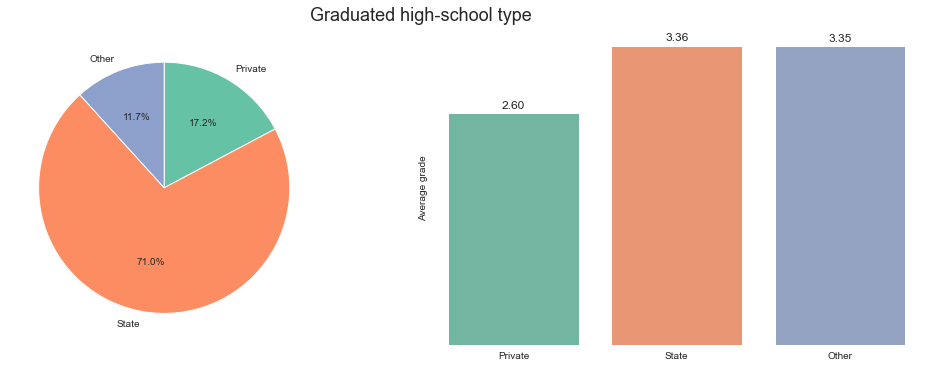

In [58]:
order = list(attr_map['hs_type'].values())
data = prediction['hs_type'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = prediction.groupby('hs_type')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Graduated high-school type', fontsize=18)
plt.show()

students from private high school perform worse than those from other
high-school types

# Job

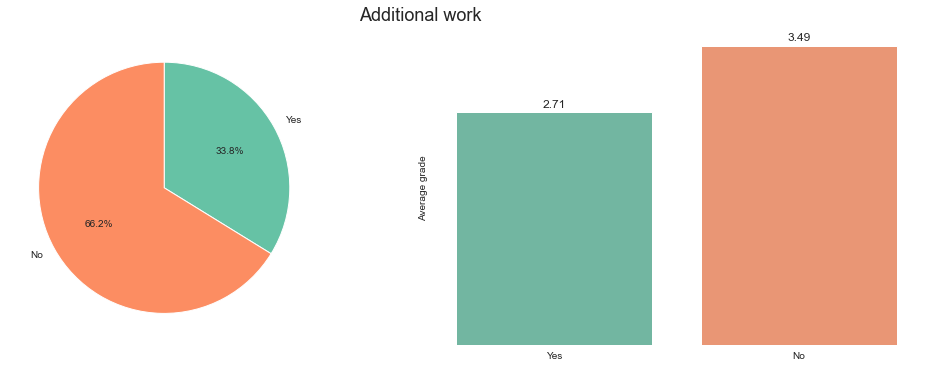

In [59]:
order = list(attr_map['work'].values())
data = prediction['work'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%', colors=palette)

data = prediction.groupby('work')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order, palette=palette)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Additional work', fontsize=18)
plt.show()

Those without additional work can solely focus on studying and earn
higher grade

In [60]:
prediction.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
#_siblings,145.0,2.806897,1.360640,1.0,2.0,3.0,4.0,5.0
course id,145.0,4.131034,3.260145,1.0,1.0,3.0,7.0,9.0
grade,145.0,3.227586,2.197678,0.0,1.0,3.0,5.0,7.0


# GPA

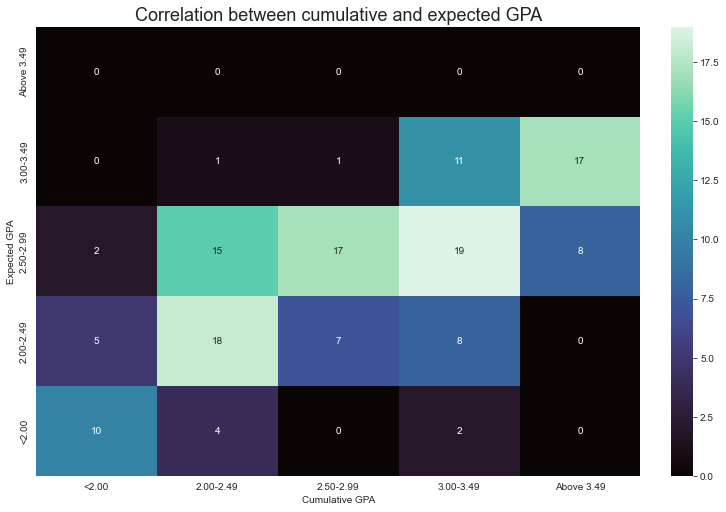

In [107]:
order = list(attr_map['cuml_gpa'].values())
gpa_sort_key = {v:k for k, v in attr_map['cuml_gpa'].items()}

data = prediction.groupby(['cuml_gpa', 'exp_gpa']).size().reset_index()
data.sort_values(by=['cuml_gpa', 'exp_gpa'], key=lambda x: x.map(gpa_sort_key), inplace=True)
data.rename(columns={0: 'counts'}, inplace=True)
data = data.pivot(index='cuml_gpa', columns='exp_gpa').fillna(0)
data.columns = data.columns.droplevel(0)
data = data.loc[order]
data[order[-1]] = 0
order.reverse()
data = data[order]

plt.figure(figsize=(10, 7), constrained_layout=True)
sns.heatmap(data.T.astype(int), annot=True, fmt='d', cmap='mako')
plt.xlabel('Cumulative GPA')
plt.ylabel('Expected GPA')
plt.title('Correlation between cumulative and expected GPA', fontsize=18)
plt.show()

Nobody has expected GPA above 3.49
Students whose cumulative GPA of 2.5 and above tend to have more expected GPA in lower band, while those with lower GPA have more expected GPA in higher band

# parents education

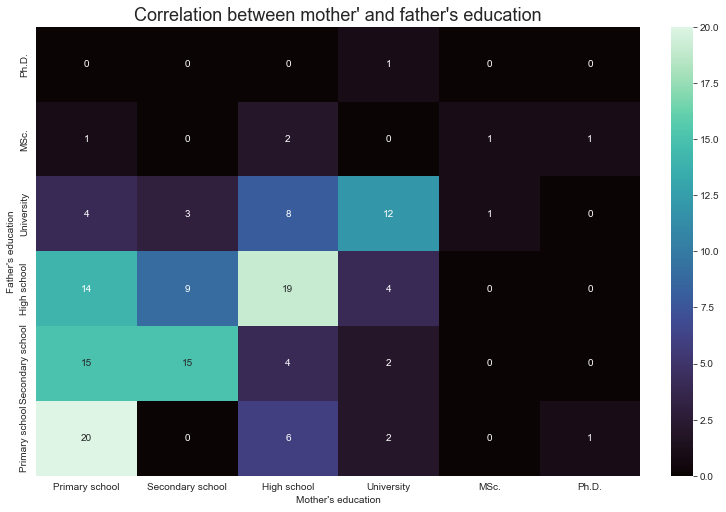

In [108]:
order = list(attr_map['mother_edu'].values())
sort_key = {v:k for k, v in attr_map['mother_edu'].items()}

data = prediction.groupby(['mother_edu', 'father_edu']).size().reset_index()
data.sort_values(by=['mother_edu', 'father_edu'], key=lambda x: x.map(sort_key), inplace=True)
data.rename(columns={0: 'counts'}, inplace=True)
data = data.pivot(index='mother_edu', columns='father_edu').fillna(0)
data.columns = data.columns.droplevel(0)
data = data.loc[order]
order.reverse()
data = data[order]

plt.figure(figsize=(10, 7), constrained_layout=True)
sns.heatmap(data.T.astype(int), annot=True, fmt='d', cmap='mako')
plt.xlabel('Mother\'s education')
plt.ylabel('Father\'s education')
plt.title('Correlation between mother\' and father\'s education', fontsize=18)
plt.show()

People tend to marry those with the same education level, especially once they reach university

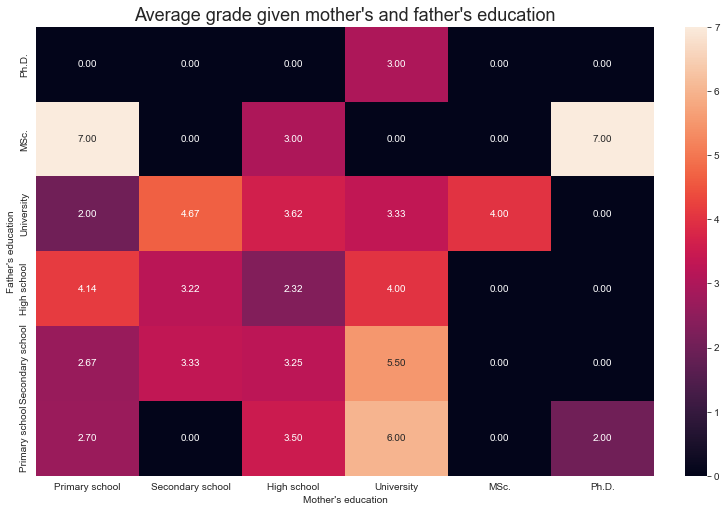

In [109]:
order = list(attr_map['mother_edu'].values())
sort_key = {v:k for k, v in attr_map['mother_edu'].items()}

data = prediction.groupby(['mother_edu', 'father_edu'])['grade'].mean().reset_index()
data.sort_values(by=['mother_edu', 'father_edu'], key=lambda x: x.map(sort_key), inplace=True)
data = data.pivot(index='mother_edu', columns='father_edu').fillna(0)
data.columns = data.columns.droplevel(0)
data = data.loc[order]
order.reverse()
data = data[order]

plt.figure(figsize=(10, 7), constrained_layout=True)
sns.heatmap(data.T, annot=True, fmt='.2f')
plt.xlabel('Mother\'s education')
plt.ylabel('Father\'s education')
plt.title('Average grade given mother\'s and father\'s education', fontsize=18)
plt.show()

The difference in parents' education level doesn't seem to have a clear impact on their children's grade

# Check missing data

In [61]:
prediction.isnull().sum()

studentid        0
age              0
gender           0
hs_type          0
scholarship      0
work             0
activity         0
partner          0
salary           0
transport        0
living           0
mother_edu       0
father_edu       0
#_siblings       0
kids             0
mother_job       0
father_job       0
study_hrs        0
read_freq        0
read_freq_sci    0
attend_dept      0
impact           0
attend           0
prep_study       0
prep_exam        0
notes            0
listens          0
likes_discuss    0
classroom        0
cuml_gpa         0
exp_gpa          0
course id        0
grade            0
dtype: int64

In [62]:
prediction.describe().T.style.background_gradient(cmap = "Oranges")

,count,mean,std,min,25%,50%,75%,max
#_siblings,145.000000,2.806897,1.360640,1.000000,2.000000,3.000000,4.000000,5.000000
course id,145.000000,4.131034,3.260145,1.000000,1.000000,3.000000,7.000000,9.000000
grade,145.000000,3.227586,2.197678,0.000000,1.000000,3.000000,5.000000,7.000000


all feature is categorical, no missing value

looking the unique value from course id

In [64]:
prediction["course id"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [65]:
prediction.describe(include=object)

,studentid,age,gender,hs_type,scholarship,work,activity,partner,salary,transport,living,mother_edu,father_edu,kids,mother_job,father_job,study_hrs,read_freq,read_freq_sci,attend_dept,impact,attend,prep_study,prep_exam,notes,listens,likes_discuss,classroom,cuml_gpa,exp_gpa
count,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145,145
unique,145,3,2,3,5,2,2,2,5,4,4,6,6,3,5,5,5,3,3,2,3,2,3,3,3,3,3,3,5,4
top,STUDENT1,22-25,Male,State,50%,No,No,No,$135-200,Bus,Rental,Primary school,High school,Married,Housewife,Self-employment,<5 hours,Sometimes,Sometimes,Yes,Positive,Yes,Alone,Closest date to the exam,Always,Sometimes,Sometimes,Not useful,3.00-3.49,2.50-2.99
freq,1,70,87,103,76,96,87,84,93,98,68,54,46,127,103,38,74,99,103,114,128,110,107,123,84,79,70,64,40,61


In [66]:
prediction= prediction.drop('studentid', axis=1)

In [14]:
prediction.head()

,age,gender,hs_type,scholarship,work,activity,partner,salary,transport,living,mother_edu,father_edu,#_siblings,kids,mother_job,father_job,study_hrs,read_freq,read_freq_sci,attend_dept,impact,attend,prep_study,prep_exam,notes,listens,likes_discuss,classroom,cuml_gpa,exp_gpa,course id,grade
0,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,Rental,Primary school,Secondary school,3,Married,Housewife,Other,6-10 hours,Sometimes,Sometimes,Yes,Positive,Yes,Alone,Closest date to the exam,Always,Sometimes,Never,Useful,<2.00,<2.00,1,1
1,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,Rental,Secondary school,High school,2,Married,Housewife,Retired,<5 hours,Sometimes,Sometimes,Yes,Positive,Yes,Alone,Closest date to the exam,Always,Sometimes,Always,Useful,2.00-2.49,2.50-2.99,1,1
2,22-25,Male,State,50%,No,No,No,$201-270,Other,Dormitory,Secondary school,Secondary school,2,Married,Housewife,Retired,<5 hours,Never,Sometimes,Yes,Positive,Yes,Alone,Closest date to the exam,Sometimes,Sometimes,Never,Not useful,2.00-2.49,2.00-2.49,1,1
3,18-21,Female,Private,50%,Yes,No,Yes,$201-270,Bus,Dormitory,Primary school,Secondary school,5,Married,Housewife,Retired,6-10 hours,Never,Sometimes,Yes,Positive,Yes,Alone,Regularly during the semester,Always,Sometimes,Sometimes,Not useful,2.50-2.99,2.00-2.49,1,1
4,22-25,Male,Private,50%,No,No,Yes,$271-340,Bus,Other,High school,High school,2,Married,Housewife,Self-employment,<5 hours,Never,Never,Yes,Positive,Yes,With friends,Closest date to the exam,Sometimes,Sometimes,Sometimes,Not useful,2.00-2.49,2.00-2.49,1,1


In [15]:
duplicate = prediction[prediction.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,age,gender,hs_type,scholarship,work,activity,partner,salary,transport,living,mother_edu,father_edu,#_siblings,kids,mother_job,father_job,study_hrs,read_freq,read_freq_sci,attend_dept,impact,attend,prep_study,prep_exam,notes,listens,likes_discuss,classroom,cuml_gpa,exp_gpa,course id,grade


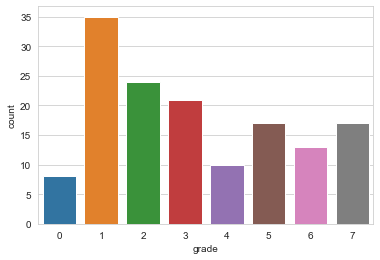

In [71]:
sns.countplot(prediction['grade'],label="Count")
plt.show()

<AxesSubplot:xlabel='grade', ylabel='prep_exam'>

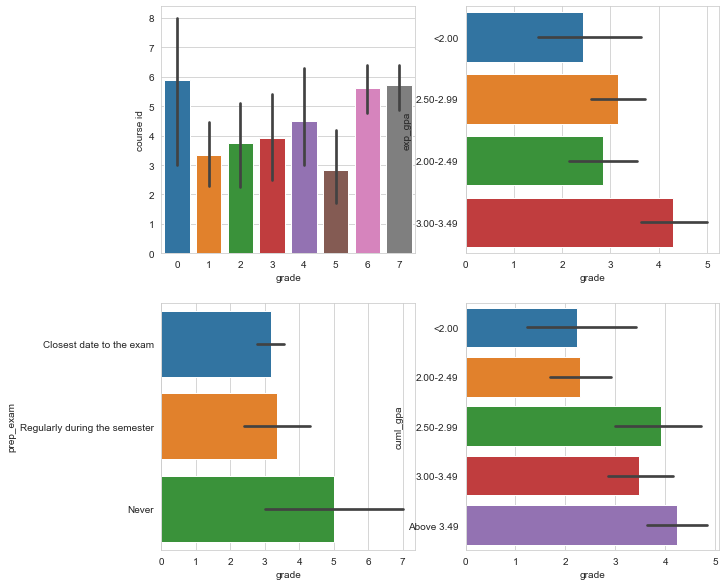

In [102]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='grade', y='course id', data=prediction, ax=axarr[0,0])
sns.barplot(x='grade', y='exp_gpa', data=prediction, ax=axarr[0,1])
sns.barplot(x='grade', y='cuml_gpa', data=prediction, ax=axarr[1,1])
sns.barplot(x='grade', y='prep_exam', data=prediction, ax=axarr[1,0])
#sns.barplot(x='GRADE', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1])order=['0','1','2', '3', '4', '5', '6', '7'],
#sns.barplot(x='GRADE', y='raisedhands', data=data, order=['L','M','H'], ax=axarr[1,0])
#sns.barplot(x='GRADE', y='Discussion', data=data, order=['L','M','H'], ax=axarr[1,1])

<AxesSubplot:xlabel='grade', ylabel='scholarship'>

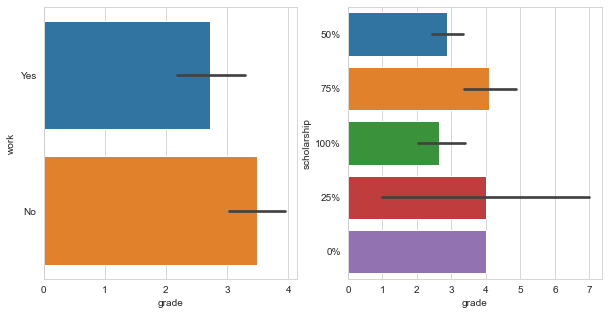

In [87]:
fig, (axis1, axis2)  = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='grade', y='work', data=prediction, ax=axis1)
sns.barplot(x='grade', y='scholarship', data=prediction, ax=axis2)

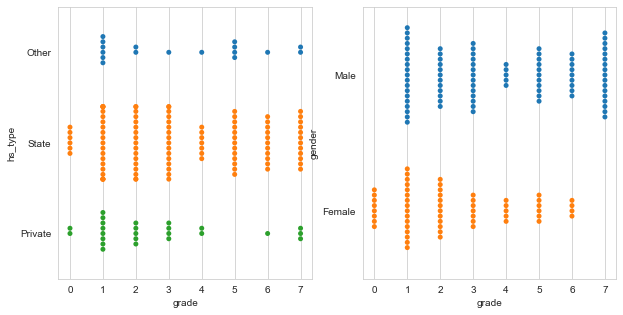

In [88]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
ax = sns.swarmplot(x='grade', y='hs_type', data=prediction, ax=axis1)
ax = sns.swarmplot(x='grade', y='gender', data=prediction, ax=axis2)

<AxesSubplot:xlabel='grade', ylabel='scholarship'>

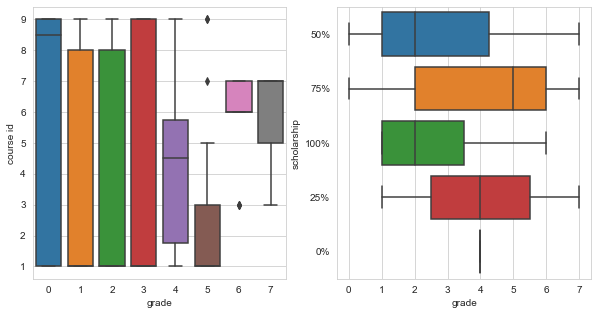

In [90]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.boxplot(x='grade', y='course id', data=prediction, ax=axis1)
sns.boxplot(x='grade', y='scholarship', data=prediction, ax=axis2)

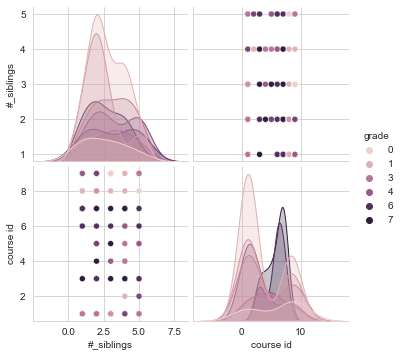

In [173]:
sns.pairplot(prediction, hue='grade')

# Label Encoding

In [ ]:
Features = prediction.drop('age', axis=1)
Target = prediction['age']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [112]:
Features = prediction.drop('gender', axis=1)
Target = prediction['gender']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [113]:
Features = prediction.drop('hs_type', axis=1)
Target = prediction['hs_type']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [114]:
Features = prediction.drop('scholarship', axis=1)
Target = prediction['scholarship']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [115]:
Features = prediction.drop('work', axis=1)
Target = prediction['work']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [116]:
Features = prediction.drop('activity', axis=1)
Target = prediction['activity']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [117]:
Features = prediction.drop('partner', axis=1)
Target = prediction['partner']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [118]:
Features = prediction.drop('salary', axis=1)
Target = prediction['salary']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [119]:
Features = prediction.drop('transport', axis=1)
Target = prediction['transport']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [120]:
Features = prediction.drop('study_hrs', axis=1)
Target = prediction['study_hrs']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [121]:
Features = prediction.drop('impact', axis=1)
Target = prediction['impact']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [122]:
Features = prediction.drop('attend', axis=1)
Target = prediction['attend']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [123]:
Features = prediction.drop('notes', axis=1)
Target = prediction['notes']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [124]:
Features = prediction.drop('listens', axis=1)
Target = prediction['listens']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [125]:
Features = prediction.drop('cuml_gpa', axis=1)
Target = prediction['cuml_gpa']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [126]:
Features = prediction.drop('exp_gpa', axis=1)
Target = prediction['exp_gpa']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [127]:
Features = prediction.drop('course id', axis=1)
Target = prediction['course id']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [128]:
Features = prediction.drop('grade', axis=1)
Target = prediction['grade']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)

In [130]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression()

In [131]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [132]:
print(Prediction)

[2 2 0 0 1 1 4 2 1 7 3 1 7 1 4 4 7 1 3 6 3 1 2 6 5 2 2 1 2]


In [133]:
print(Score)

0.41379310344827586


In [134]:
print(Report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.50      0.50      0.50         8
           2       0.29      0.50      0.36         4
           3       0.67      0.33      0.44         6
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.50      0.33      0.40         3
           7       0.67      0.67      0.67         3

    accuracy                           0.41        29
   macro avg       0.39      0.42      0.38        29
weighted avg       0.45      0.41      0.41        29



# Feature Selection

In [17]:
X = prediction.drop('GRADE', axis=1)
y = prediction['GRADE']
discrete_features = X.dtypes == int

list discrete features that have integer dtypes for using MI

In [18]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

COURSE ID        0.385774
CUML_GPA         0.140510
HS_TYPE          0.139605
LIVING           0.135204
AGE              0.128687
MOTHER_EDU       0.118853
FATHER_JOB       0.087042
LIKES_DISCUSS    0.072281
GENDER           0.071368
SALARY           0.066000
ATTEND           0.063638
EXP_GPA          0.059649
ATTEND_DEPT      0.042891
PARTNER          0.036308
KIDS             0.032576
WORK             0.026337
READ_FREQ_SCI    0.020757
LISTENS          0.019138
IMPACT           0.005794
NOTES            0.003017
READ_FREQ        0.000000
STUDY_HRS        0.000000
MOTHER_JOB       0.000000
#_SIBLINGS       0.000000
PREP_STUDY       0.000000
PREP_EXAM        0.000000
FATHER_EDU       0.000000
CLASSROOM        0.000000
SCHOLARSHIP      0.000000
TRANSPORT        0.000000
ACTIVITY         0.000000
Name: MI Scores, dtype: float64

In [19]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0]

X = drop_uninformative(X, mi_scores)

In [105]:
display(X)

,AGE,GENDER,HS_TYPE,WORK,PARTNER,SALARY,LIVING,MOTHER_EDU,KIDS,FATHER_JOB,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,NOTES,LISTENS,LIKES_DISCUSS,CUML_GPA,EXP_GPA,COURSE ID,Cluster
0,2,2,3,1,2,1,1,1,1,5,2,1,1,1,3,2,1,1,1,1,7
1,2,2,3,1,2,1,1,2,1,1,2,1,1,1,3,2,3,2,3,1,3
2,2,2,2,2,2,2,2,2,1,1,2,1,1,1,2,2,1,2,2,1,3
3,1,1,1,1,1,2,2,1,1,1,2,1,1,1,3,2,2,3,2,1,3
4,2,2,1,2,1,3,4,3,1,4,1,1,1,1,2,2,2,2,2,1,7
5,2,2,2,2,2,2,1,3,1,3,2,1,1,1,1,2,1,4,4,1,6
6,1,2,2,2,2,1,3,1,1,4,2,2,1,2,3,3,3,4,4,1,6
7,1,1,2,1,1,2,3,4,1,3,2,1,1,1,3,2,2,1,1,1,3
8,2,1,3,2,1,1,3,2,1,4,2,1,1,1,3,2,2,4,3,1,6
9,2,1,2,2,1,3,2,1,1,3,2,1,1,2,2,2,2,1,2,1,7


# Clustering

In [20]:
kmeans = KMeans(n_clusters=8, random_state=0)
X["Cluster"] = kmeans.fit_predict(X)

# Model Building

In [21]:
decision_tree = dtc(random_state=0)
decision_tree.fit(X,y)

predict = cross_val_predict(estimator = decision_tree, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.12      0.12      0.12         8
           1       0.21      0.26      0.23        35
           2       0.29      0.29      0.29        24
           3       0.19      0.19      0.19        21
           4       0.00      0.00      0.00        10
           5       0.09      0.12      0.10        17
           6       0.25      0.15      0.19        13
           7       0.55      0.35      0.43        17

    accuracy                           0.21       145
   macro avg       0.21      0.19      0.19       145
weighted avg       0.23      0.21      0.22       145



In [22]:
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X, y)
predict = cross_val_predict(estimator = random_forest, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.22      0.25      0.24         8
           1       0.35      0.54      0.42        35
           2       0.38      0.38      0.38        24
           3       0.29      0.19      0.23        21
           4       0.00      0.00      0.00        10
           5       0.08      0.06      0.07        17
           6       0.25      0.15      0.19        13
           7       0.45      0.59      0.51        17

    accuracy                           0.32       145
   macro avg       0.25      0.27      0.25       145
weighted avg       0.28      0.32      0.30       145



In [23]:
knn = KNeighborsClassifier()
knn.fit(X,y)
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.21      0.38      0.27         8
           1       0.27      0.46      0.34        35
           2       0.35      0.29      0.32        24
           3       0.20      0.10      0.13        21
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        17
           6       0.11      0.15      0.13        13
           7       0.29      0.24      0.26        17

    accuracy                           0.23       145
   macro avg       0.18      0.20      0.18       145
weighted avg       0.21      0.23      0.21       145



In [24]:
gnb = GaussianNB()
gnb.fit(X,y)
predict = cross_val_predict(estimator = gnb, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.24      0.50      0.32         8
           1       0.57      0.11      0.19        35
           2       0.50      0.08      0.14        24
           3       0.50      0.10      0.16        21
           4       0.04      0.20      0.07        10
           5       0.00      0.00      0.00        17
           6       0.07      0.15      0.10        13
           7       0.32      0.65      0.43        17

    accuracy                           0.19       145
   macro avg       0.28      0.22      0.18       145
weighted avg       0.35      0.19      0.17       145



In [25]:
scv = SVC()
scv.fit(X,y)
predict = cross_val_predict(estimator = scv, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.32      0.74      0.44        35
           2       0.17      0.04      0.07        24
           3       0.43      0.14      0.21        21
           4       0.00      0.00      0.00        10
           5       0.08      0.06      0.07        17
           6       0.00      0.00      0.00        13
           7       0.23      0.47      0.31        17

    accuracy                           0.28       145
   macro avg       0.22      0.20      0.16       145
weighted avg       0.23      0.28      0.20       145



# Roc Curve

In [168]:
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

In [171]:
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

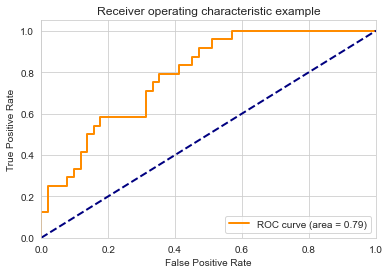

In [172]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix

In [161]:
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

In [162]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[0 1 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]]
Normalized confusion matrix
[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


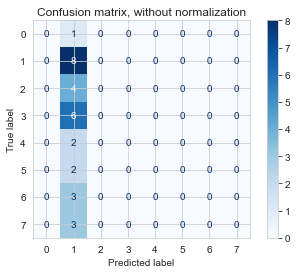

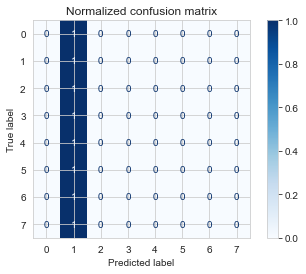

In [163]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        #display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()